In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Sample text
text = """I don't feel anything but sometimes I do. Life is strange and beautiful.
I love sunny days but dislike when it rains all week."""

In [ ]:
# Function to clean and preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

In [ ]:
# Preprocess the text
cleaned_words = preprocess_text(text)

In [ ]:
# Function to visualize the most common words
def plot_word_frequency(words):
    fdist = FreqDist(words)
    most_common_words = fdist.most_common(10)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title('Top 10 Most Common Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

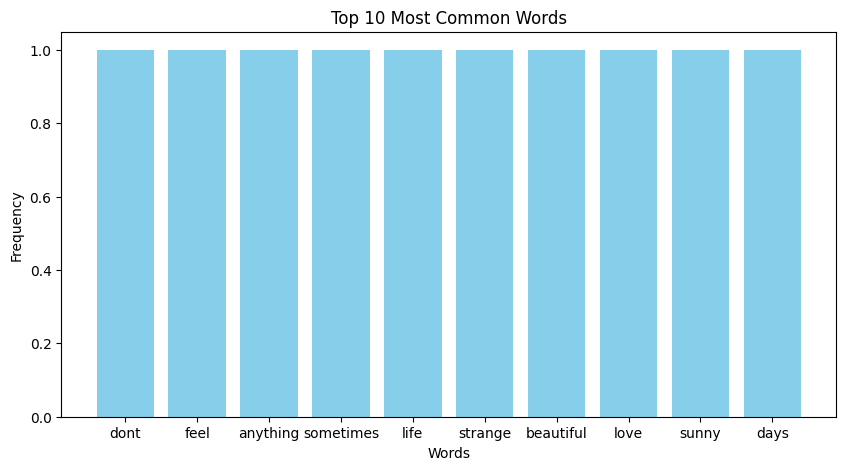

In [ ]:
# Plot word frequency
plot_word_frequency(cleaned_words)

In [ ]:
# Function to generate a word cloud
def generate_word_cloud(words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

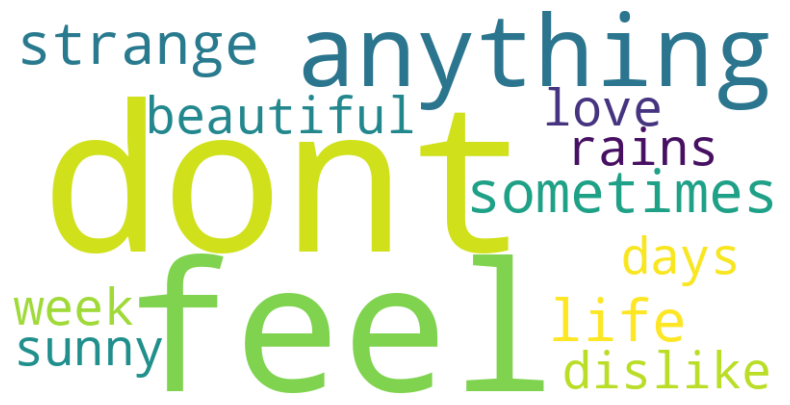

In [ ]:
# Generate the word cloud
generate_word_cloud(cleaned_words)

In [ ]:
# Function to analyze sentiment and classify into more emotions
def detect_emotion(text):
    scores = sid.polarity_scores(text)
    print("Sentiment Scores:", scores)
    compound = scores['compound']
    if compound >= 0.6:
        return 'very positive'
    elif 0.05 <= compound < 0.6:
        return 'positive'
    elif -0.05 < compound < 0.05:
        return 'neutral'
    elif -0.6 < compound <= -0.05:
        return 'negative'
    else:
        return 'very negative'

In [ ]:
# Analyze sentiment
emotion = detect_emotion(text)
print("Overall Emotion:", emotion)

Sentiment Scores: {'neg': 0.154, 'neu': 0.439, 'pos': 0.407, 'compound': 0.9052}
Overall Emotion: very positive


In [ ]:
# Function to plot sentiment scores
def plot_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    labels = list(scores.keys())
    values = list(scores.values())

    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color=['green', 'blue', 'red', 'orange'])
    plt.title('Sentiment Score Distribution')
    plt.show()

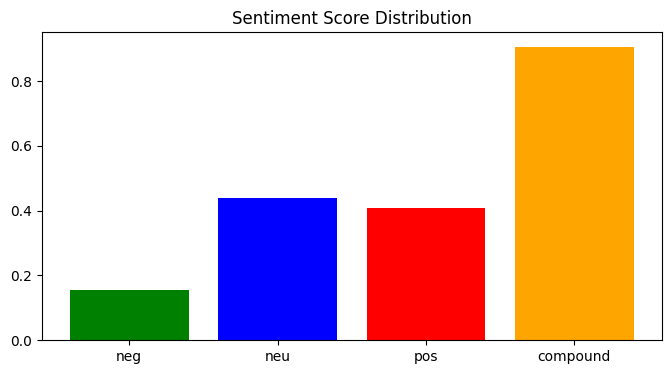

In [ ]:
# Plot sentiment scores
plot_sentiment_scores(text)

In [ ]:
# Text statistics
def text_statistics(text):
    words = word_tokenize(text)
    num_words = len(words)
    num_sentences = len(sent_tokenize(text))
    avg_words_per_sentence = num_words / num_sentences if num_sentences > 0 else 0

    print("Text Statistics:")
    print(f"Total Words: {num_words}")
    print(f"Total Sentences: {num_sentences}")
    print(f"Average Words per Sentence: {avg_words_per_sentence:.2f}")

In [ ]:
# Display text statistics
text_statistics(text)

Text Statistics:
Total Words: 28
Total Sentences: 3
Average Words per Sentence: 9.33
